# OkCupid Date-A-Scientist Project

## Overview

This project analyzes data from **OKCupid**, an app that focuses on using multiple choice and short answers to match users.  The purpose of this project is to practice formulating questions and implementing machine learning techniques to answer those questions.  

The OKCupid dataset named `profiles.csv` was provided by **Codecademy.com**. Other helpful resources will be used in this project, such as **NumPy**, **Pandas**, **Matplotlib**, **Seaborn**, and **Scikit-learn**.  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Check the Data

In [4]:
# Load the OKCupid dataset 
profiles = pd.read_csv('profiles.csv', low_memory=False, encoding='utf-8')

# Display the names of the columns in the dataset
print(profiles.columns) 
# Count the number of columns in the dataset
num_col = len(profiles.columns)
print(f"Number of columns: {num_col}")
# Count the number of rows in the dataset
num_row = len(profiles)
print(f"Number of rows: {num_row}")
# Display the first five rows of the dataset
profiles.head()

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
Number of columns: 31
Number of rows: 60552


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


## Explore the Data

### Age and Gender

The cell below focuses on cleaning and visualizing the age data from the OKCupid dataset. It first converts the `'age'` column to a numeric type, removes any rows with missing or invalid ages, and filters out users older than 90 to ensure the data is reasonable.

After cleaning, it creates two plots:
- The first plot shows the overall distribution of ages among users, helping to visualize the most common age ranges on the platform.
- The second plot breaks down the age distribution by gender (using the `'sex'` column), allowing for comparison between different gender groups in the dataset.

Additionally, the cell prints the number of men and women in the dataset, providing a quick summary of the gender distribution.

These visualizations and counts provide insight into the age and gender demographics of OKCupid users and help identify any patterns or anomalies in the data.

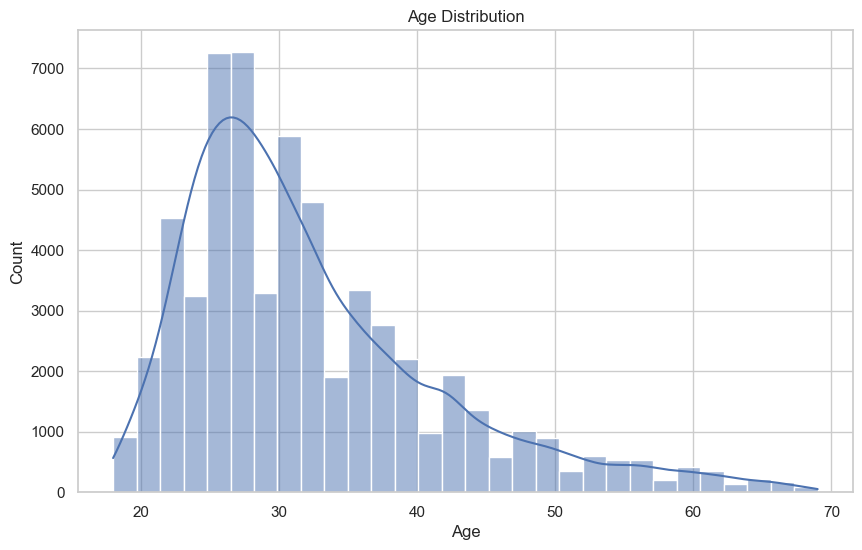

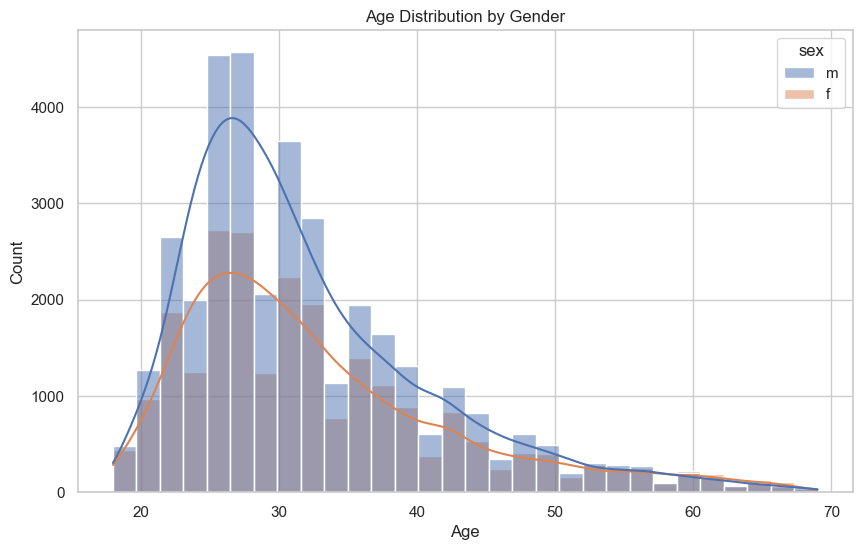

Number of men in dataset: 35825
Number of women in dataset: 24116


In [12]:
# Convert 'age' column to numeric, ignoring errors
profiles['age'] = pd.to_numeric(profiles['age'], errors='coerce')
# Remove rows with NaN values in 'age' column
profiles = profiles.dropna(subset=['age'])
# Filter out ages greater than 90
profiles = profiles[profiles['age'] <= 90]
# This plot shows the distribution of ages in the dataset
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(profiles['age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# This is the same plot, but broken down by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=profiles, x='age', hue='sex', bins=30, kde=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Display the number of men and women in the dataset
print("Number of men in dataset:", (profiles['sex'] == 'm').sum())
print("Number of women in dataset:", (profiles['sex'] == 'f').sum())

In [13]:
# Display the number of unique values in the 'sign' column
print("Number of unique signs:", profiles['sign'].nunique()) 
# Display the unique values in the 'sign' column with their counts
print(profiles['sign'].value_counts())

Number of unique signs: 48
sign
gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1648
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1596
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1

## Clean the Data

In [ ]:
profiles['sign_cleaned'] = profiles['sign'].str.split().str[0]  # Split the 'sign' column and keep only the first part (the zodiac sign)
print("Number of Signs after cleaning:", profiles.sign_cleaned.nunique())  # Count the number of unique zodiac signs after cleaning
print(profiles['sign_cleaned'].value_counts())  # Count the occurrences of each zodiac sign after cleaning